# Reaction rates  of all reaction involving $CH_2F_2$
**Alice Barbarino and Maria Crist**

This notebook presents the processing workflow for the results of the reactive molecular dynamics simulations performed with LAMMPS. The auxiliary script `reaction_rates_aux.py` contains the functions used in the analyses. Additionally, the `.html` analysis report generated with ReacNetGenerator from the `dump` file is also available in the repository.


## Imports

In [2]:
import re
import matplotlib.pyplot as plt
from parse import search
from collections import defaultdict
from reaction_rates_aux import *

## Variables

In [3]:
Temperatures = [700, 900, 1300, 1500, 2000, 2300, 2500]
concentrations = [10, 40, 60]

ch2f2 = '[H][C]([H])([F])[F]'

## Exploring the reactions

In [6]:
#nested dict to store all results
all_results = defaultdict(dict)

for T in Temperatures:
    for c in concentrations:
        file_name = f"ch2f2_reactions_{T}K_{c}ch2f2.txt"
        
        with open(file_name, 'r', encoding='utf-8') as f:
            content = f.read()

        # patter to capture reactions and their values
        patter = r"^(.+?)\s+(\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)\s*$"
        
        for match in re.finditer(patter, content, re.MULTILINE):
            reaction = match.group(1).strip()
            number = float(match.group(2))
            
            all_results[reaction][(T, c)] = number

print(f"Total reactions found: {len(all_results)}")
for key in all_results.keys():
    print(key)

Total reactions found: 36
Timestep:
[H][C]([H])([F])[F]->[H]+[H][C]([F])[F]
[H]+[H][C]([F])[F]->[H][C]([H])([F])[F]
[H][C]([H])([F])[F]+[N]#[N]->[H][C]([F])[F]+[H][N]=[N]
[H][C]([F])[F]+[H][N]=[N]->[H][C]([H])([F])[F]+[N]#[N]
[H][C]([H])([F])[F]->[F]+[H][C]([H])[F]
[F]+[H][C]([H])[F]->[H][C]([H])([F])[F]
[H][C]([H])([F])[F]+[N]#[N]->[H][C]([F])[F]+[H][N][N]
[H][C]([F])[F]+[H][N][N]->[H][C]([H])([F])[F]+[N]#[N]
[H][C]([H])([F])[F]->[F]+[F]+[H][C][H]
[F]+[F]+[H][C][H]->[H][C]([H])([F])[F]
[F]+[H]+[H][C][F]->[H][C]([H])([F])[F]
[H][C]([H])([F])[F]->[F]+[H]+[H][C][F]
[H]+[H][C]([H])([F])[F]->[H][C]([F])[F]+[H][H]
[H][C]([H])([F])[F]+[H][N][N]->[H][C]([F])[F]+[H][N][N][H]
[H][C]([F])[F]+[H][N][N][H]->[H][C]([H])([F])[F]+[H][N][N]
[H][C]([H])([F])[F]+[H][O]->[H][C]([F])[F]+[H][O][H]
[H][C]([H])([F])[F]+[N][N]->[H][C]([F])[F]+[H][N]=[N]
[H][C]([H])([F])[F]+[O]->[H][C]([F])[F]+[H][O]
[H][C]([H])([F])[F]+[H][N]=[N]->[H][C]([F])[F]+[H][N][N][H]
[H][C]([F])[F]+[H][N]=[N]->[H][C]([H])([F])[F]+[N][

In [7]:
# Filter reactions: only reaction with no nitrogen
filtered_reactions = {}
for reac, data in all_results.items():
    if has_nitrogen(reac):
        continue
    if data:
        filtered_reactions[reac] = data
print(len(filtered_reactions))

23


In [8]:
# Since many reactions only occur once, filtering them out
filtered_data = {k: v for k, v in filtered_reactions.items() if len(v) > 1}
print(len(filtered_data))

17


## Plotting the unique reactions of interest

Reaction Group Analysis:

Original number of reaction strings: 17
Number of unique chemical reactions: 16

--- $CH_{2}F_{2}$ → $CHF_{2}$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
700       	10        	1.000e+07
700       	60        	1.327e+07
900       	10        	7.901e+08
900       	40        	1.250e+07
900       	60        	5.831e+07
1300      	10        	9.001e+07
1300      	40        	1.433e+09
1300      	60        	8.945e+08
1500      	10        	1.129e+10
1500      	40        	1.963e+09
1500      	60        	5.157e+08
2000      	10        	5.452e+10
2000      	40        	8.596e+09
2000      	60        	3.918e+09
2300      	10        	8.415e+10
2300      	40        	1.432e+09
2300      	60        	1.504e+10
2500      	10        	5.683e+11
2500      	40        	3.926e+10
2500      	60        	1.809e+10


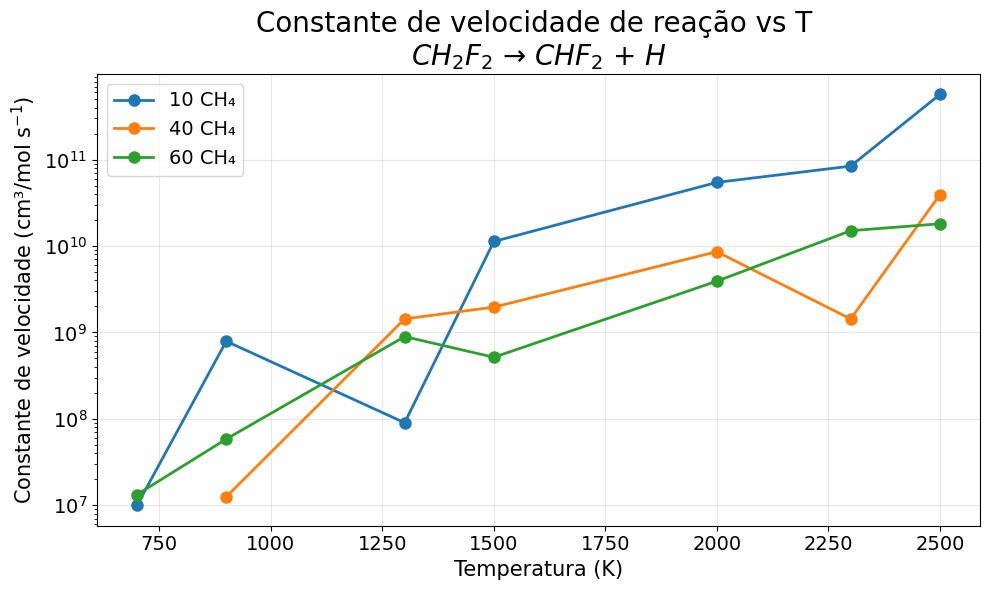


--- $CHF_{2}$ + $H$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
700       	10        	1.927e+20
700       	60        	1.927e+20
900       	10        	1.812e+20
900       	40        	1.927e+20
900       	60        	1.823e+20
1300      	10        	1.927e+20
1300      	40        	4.530e+19
1300      	60        	1.053e+18
1500      	10        	1.807e+18
1500      	40        	4.069e+17
1500      	60        	8.827e+17
2000      	10        	3.903e+17
2000      	40        	1.924e+18
2000      	60        	9.580e+17
2300      	10        	1.989e+17
2300      	40        	4.537e+19
2300      	60        	3.174e+17
2500      	10        	7.181e+16
2500      	40        	8.821e+16
2500      	60        	2.760e+17


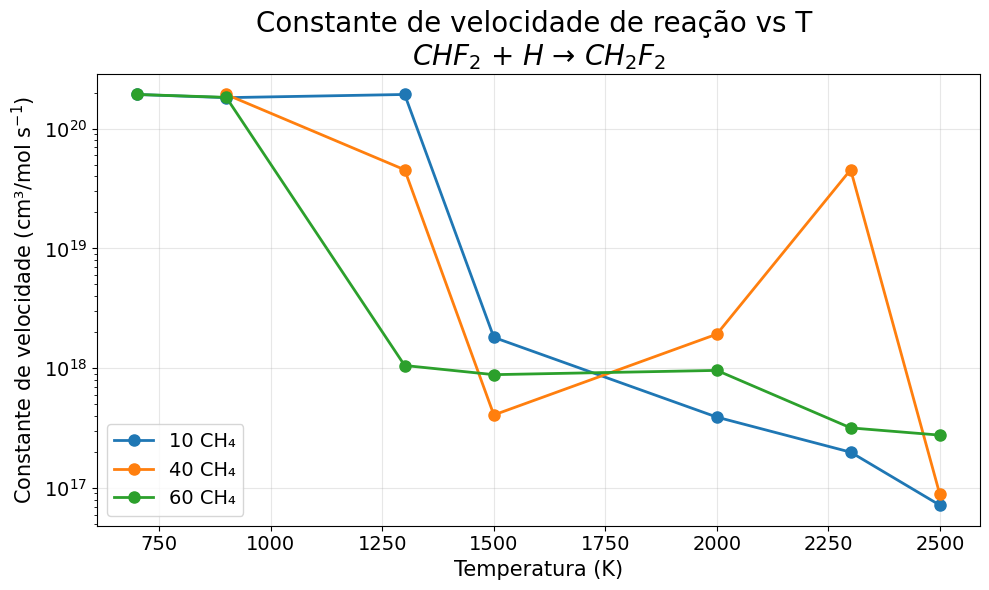


--- $CH_{2}F_{2}$ → $CH_{2}F$ + $F$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
700       	40        	8.696e+07
700       	60        	2.323e+08
900       	10        	4.181e+09
900       	40        	1.675e+08
900       	60        	3.898e+08
1300      	10        	2.280e+09
1300      	40        	5.114e+09
1300      	60        	3.629e+09
1500      	10        	5.347e+10
1500      	40        	8.079e+09
1500      	60        	3.601e+09
2000      	10        	1.963e+11
2000      	40        	3.818e+10
2000      	60        	2.006e+10
2300      	10        	2.872e+11
2300      	40        	5.100e+09
2300      	60        	7.354e+10
2500      	10        	1.611e+12
2500      	40        	1.628e+11
2500      	60        	8.881e+10


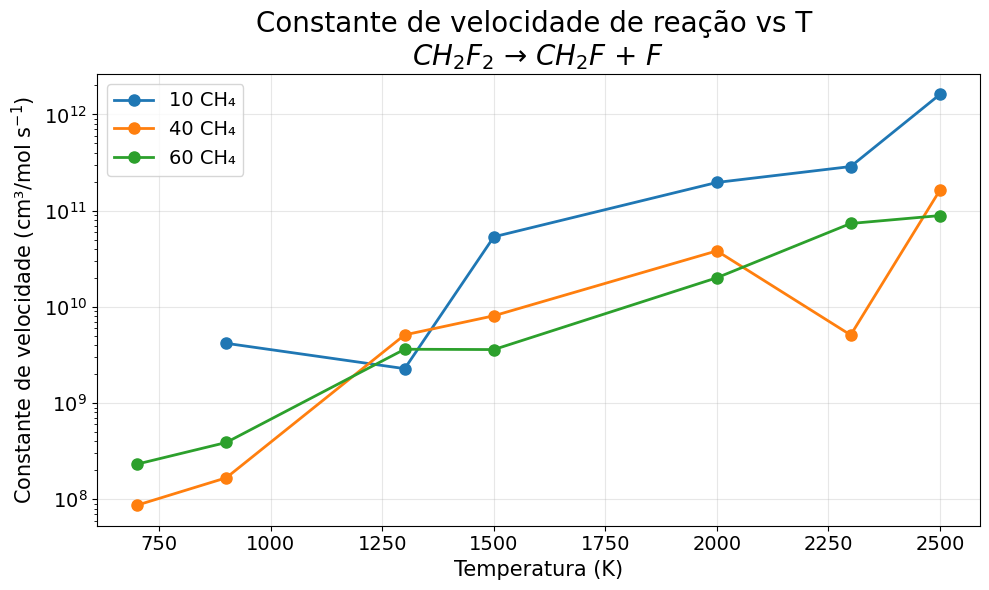


--- $CH_{2}F$ + $F$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
700       	40        	1.927e+20
700       	60        	1.927e+20
900       	10        	1.904e+20
900       	40        	1.927e+20
900       	60        	1.927e+20
1300      	10        	1.910e+20
1300      	40        	1.781e+20
1300      	60        	1.851e+20
1500      	10        	1.873e+20
1500      	40        	1.782e+20
1500      	60        	1.906e+20
2000      	10        	1.717e+20
2000      	40        	1.728e+20
2000      	60        	1.812e+20
2300      	10        	1.717e+20
2300      	40        	1.781e+20
2300      	60        	1.575e+20
2500      	10        	1.434e+20
2500      	40        	1.464e+20
2500      	60        	1.594e+20


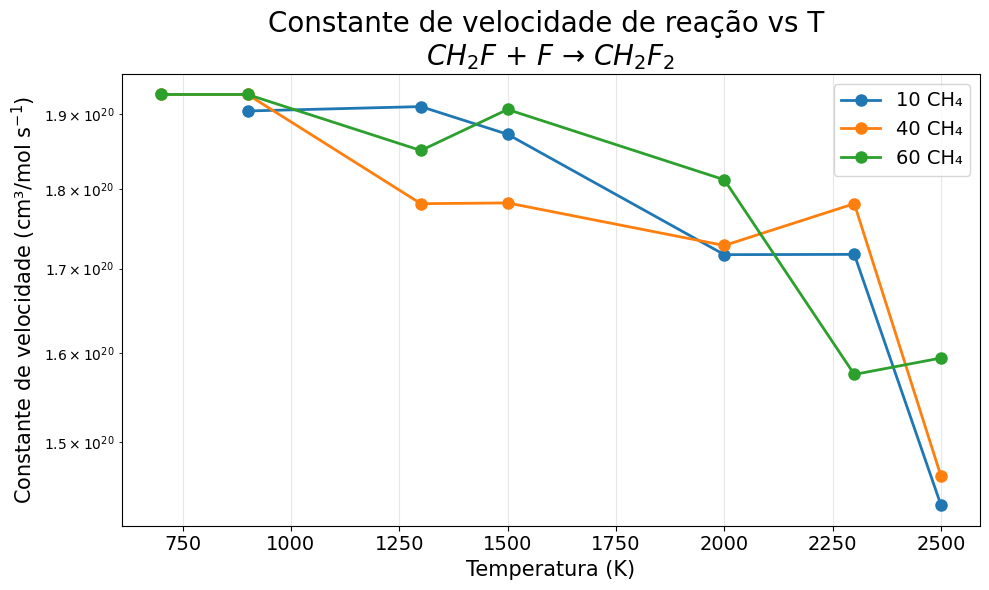


--- $CH_{2}F_{2}$ → $CH_{2}$ + $F$ + $F$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	2.564e+07
1300      	60        	3.388e+06
1500      	10        	1.089e+07
1500      	40        	1.107e+07
1500      	60        	1.778e+06
2000      	10        	1.406e+08
2000      	40        	1.743e+07
2000      	60        	1.867e+06
2300      	10        	3.312e+07
2300      	40        	2.556e+07
2300      	60        	2.021e+07
2500      	10        	2.472e+09
2500      	40        	6.015e+07
2500      	60        	1.859e+07


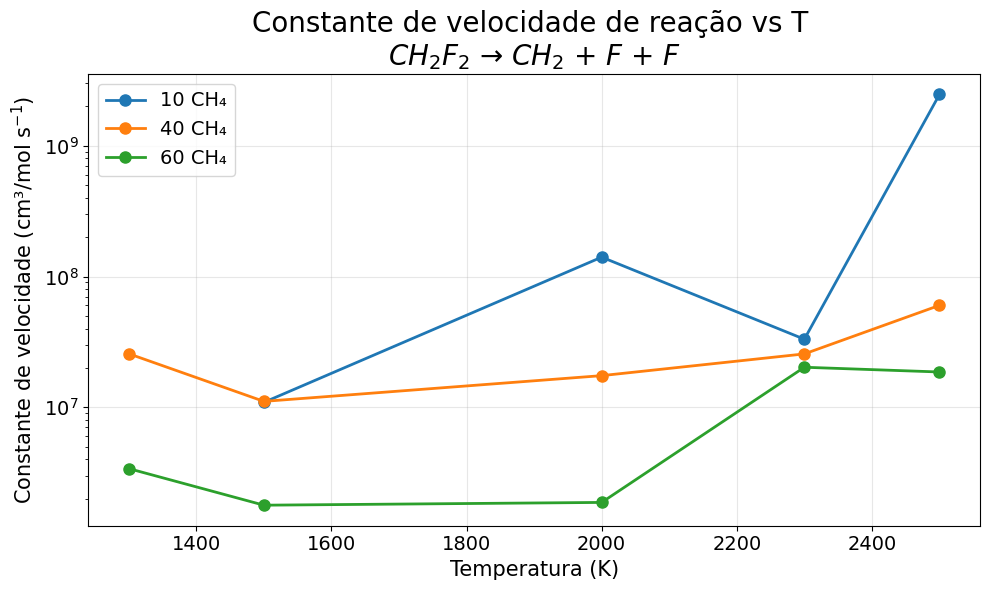


--- $CH_{2}$ + $F$ + $F$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	2.089e+26
1300      	60        	2.321e+26
1500      	10        	2.321e+26
1500      	40        	2.321e+26
1500      	60        	2.321e+26
2000      	10        	2.038e+26
2000      	40        	2.321e+26
2000      	60        	2.321e+26
2300      	10        	2.321e+26
2300      	40        	2.089e+26
2300      	60        	1.816e+26
2500      	10        	2.038e+26
2500      	40        	1.824e+26
2500      	60        	1.768e+26


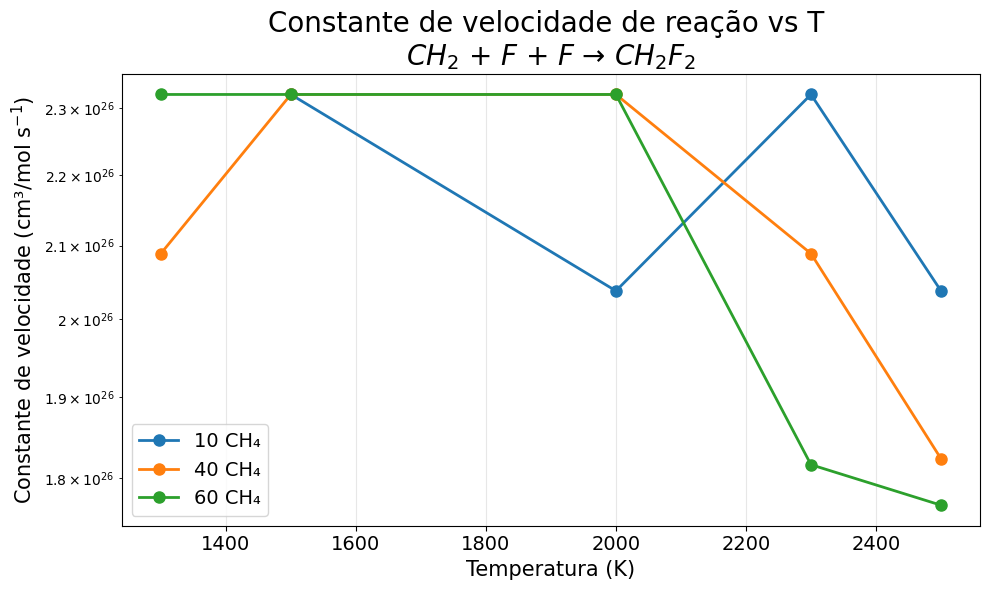


--- $CHF$ + $F$ + $H$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	1.274e+26
1300      	60        	9.284e+26
1500      	10        	9.284e+26
1500      	40        	3.482e+26
2000      	10        	3.889e+25
2000      	40        	1.766e+25
2000      	60        	2.321e+26
2300      	10        	1.683e+24
2300      	40        	1.274e+26
2300      	60        	4.110e+24
2500      	10        	4.281e+23
2500      	40        	4.038e+23
2500      	60        	1.052e+24


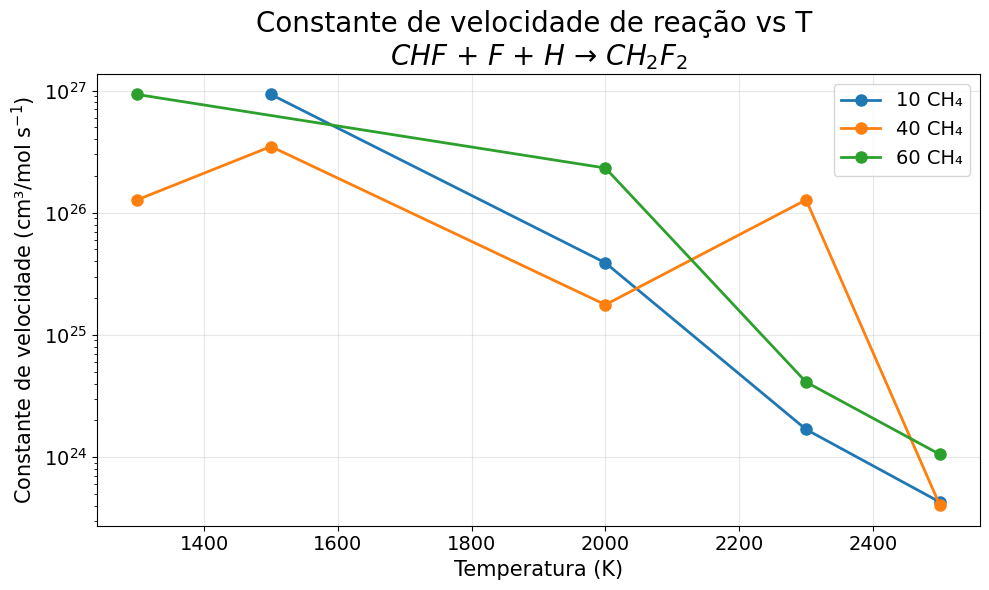


--- $CH_{2}F_{2}$ → $CHF$ + $F$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	1.282e+07
1300      	60        	1.694e+06
1500      	10        	2.177e+07
1500      	40        	8.306e+06
2000      	10        	1.250e+08
2000      	40        	2.615e+07
2000      	60        	1.867e+06
2300      	10        	1.656e+08
2300      	40        	1.278e+07
2300      	60        	2.246e+07
2500      	10        	5.493e+08
2500      	40        	3.828e+07
2500      	60        	9.295e+06


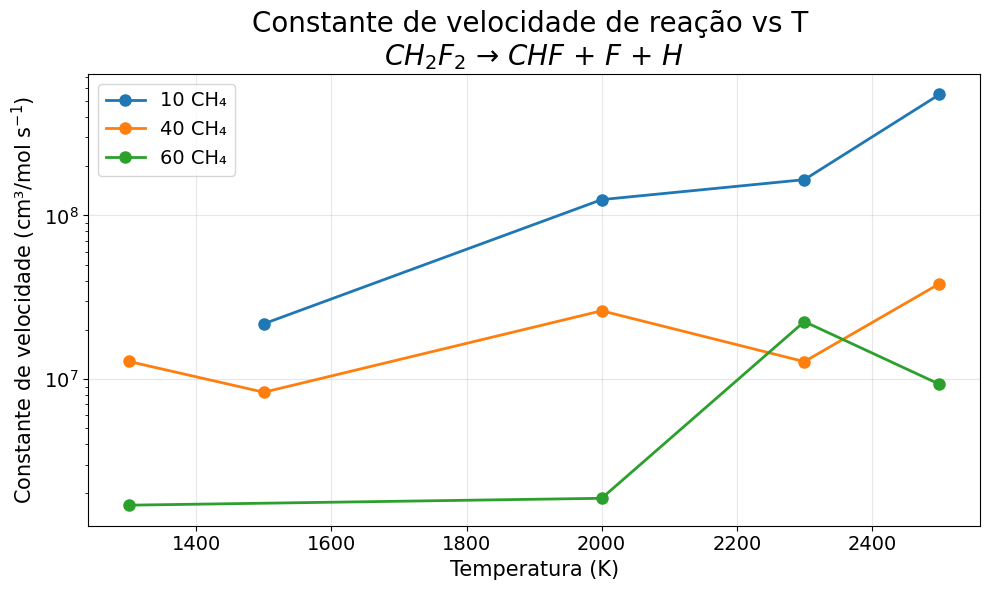


--- $CH_{2}F_{2}$ + $H$ → $CHF_{2}$ + $H_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	40        	4.434e+13
2000      	10        	5.473e+13
2000      	60        	2.224e+13
2300      	60        	4.035e+13
2500      	10        	5.070e+14
2500      	40        	9.520e+13
2500      	60        	6.981e+13


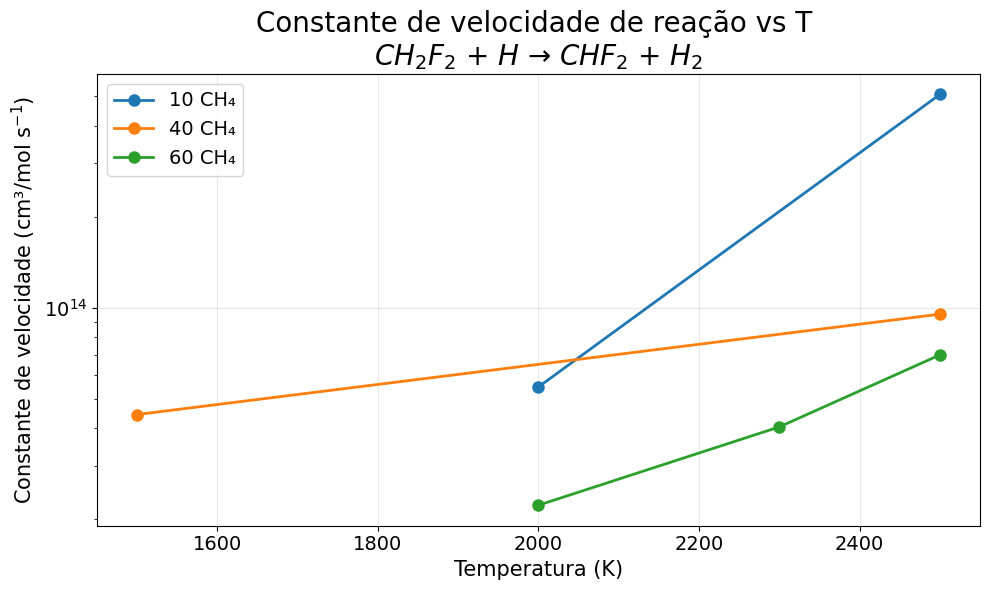


--- $CH_{2}F_{2}$ + $HO$ → $CHF_{2}$ + $H_{2}O$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	6.101e+13
2000      	40        	1.310e+14
2000      	60        	2.284e+13
2300      	60        	1.619e+13
2500      	40        	1.649e+13
2500      	60        	1.551e+13


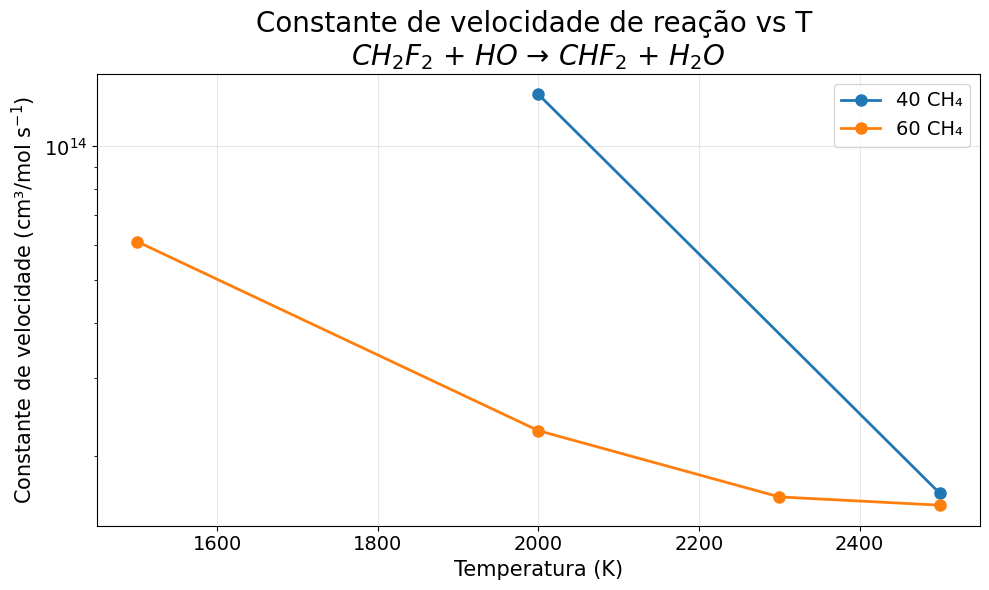


--- $CH_{2}F_{2}$ + $O$ → $CHF_{2}$ + $HO$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	2.218e+13
2000      	40        	8.560e+13
2000      	60        	5.825e+13
2300      	10        	5.630e+13
2300      	60        	9.391e+13
2500      	40        	3.579e+13


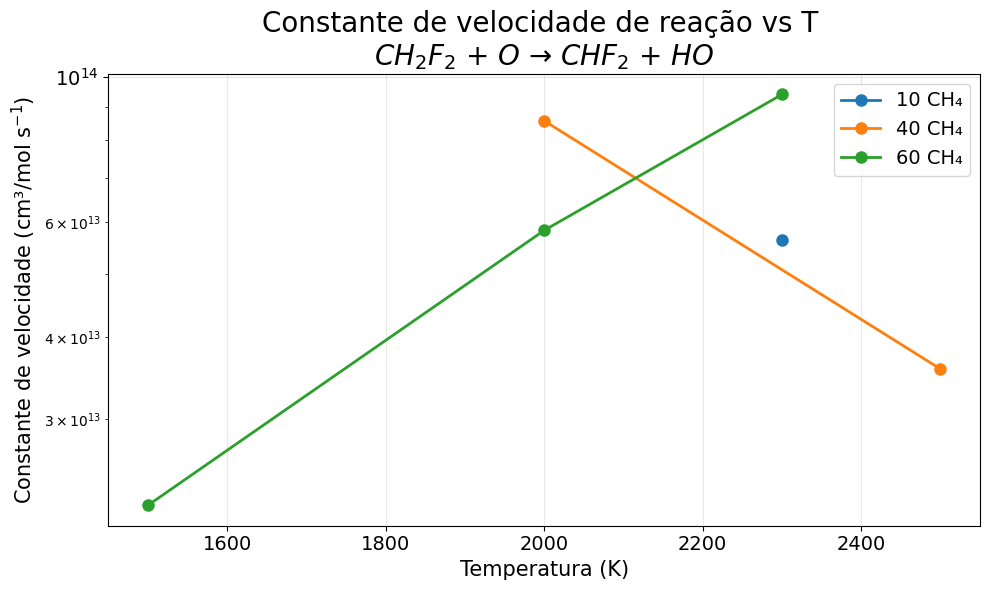


--- $CH_{2}F_{2}$ → $CHF$ + $HF$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	40        	2.905e+06
2000      	60        	1.867e+06
2300      	60        	2.246e+06
2500      	10        	2.747e+08
2500      	40        	1.640e+07
2500      	60        	4.647e+06


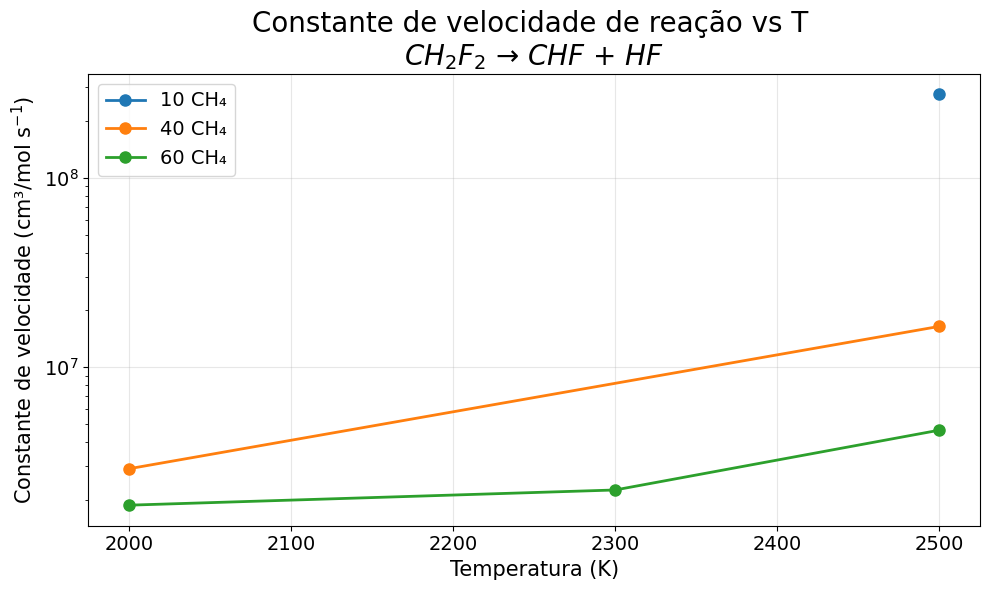


--- $CH_{2}F_{2}$ + $H$ → $CH_{2}F$ + $HF$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	60        	2.224e+13
2300      	60        	1.009e+13
2500      	40        	2.380e+13
2500      	60        	8.727e+12


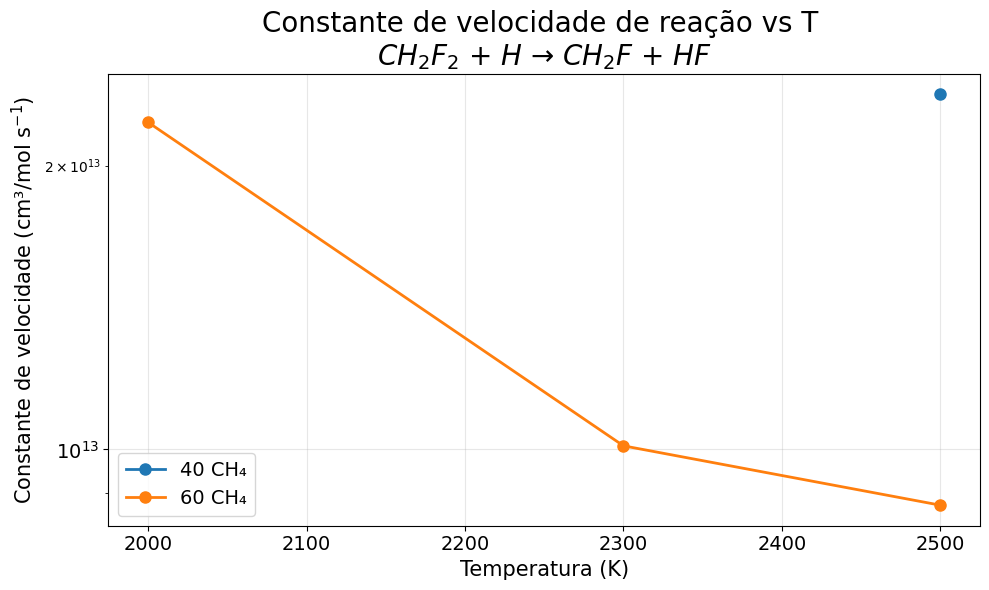


--- $CH_{2}F$ + $HF$ → $CH_{2}F_{2}$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	60        	1.927e+20
2300      	60        	1.927e+20
2500      	40        	9.635e+19
2500      	60        	9.635e+19


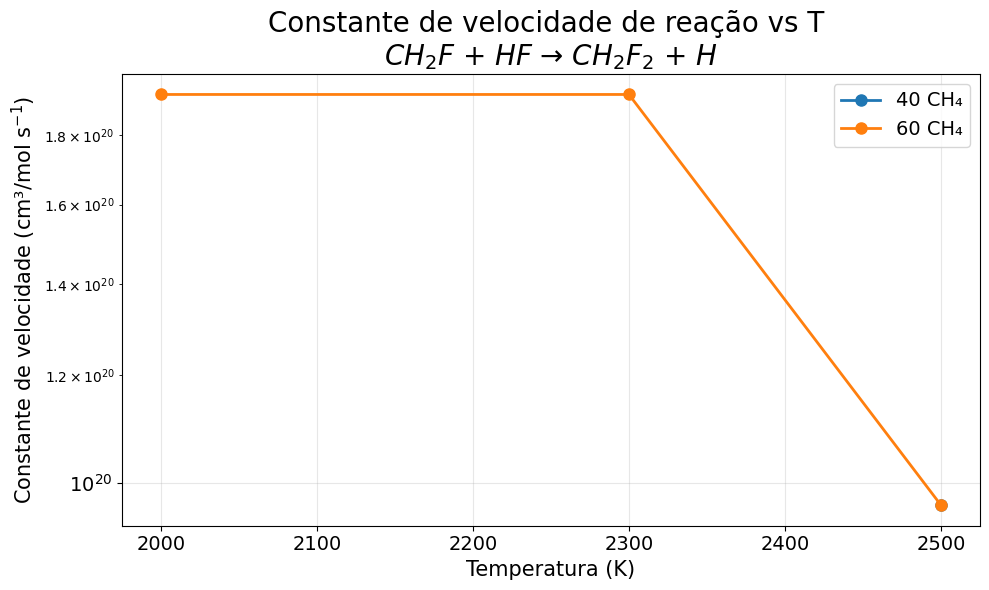


--- $CHF$ + $HF$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2300      	60        	1.927e+20
2500      	10        	2.029e+17
2500      	40        	1.927e+20
2500      	60        	1.285e+20


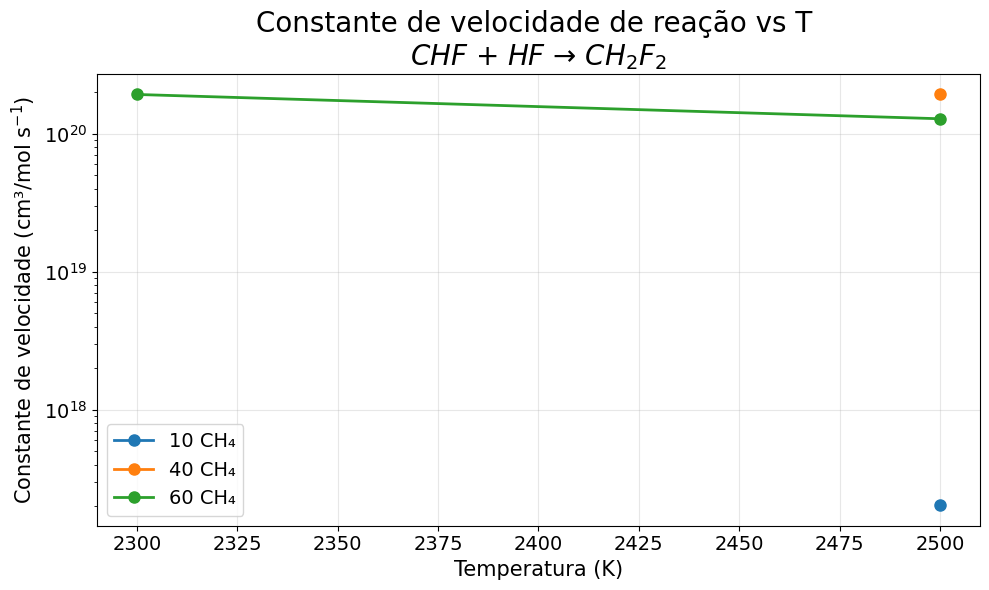


--- $CF_{2}$ + $H$ + $H$ → $CH_{2}F_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2500      	40        	5.023e+22
2500      	60        	8.105e+21


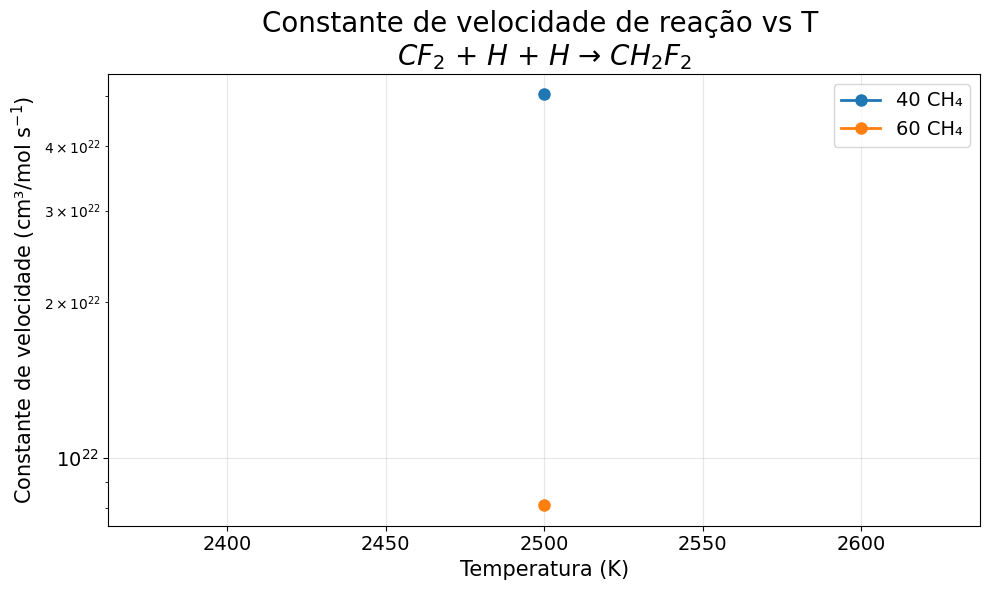

In [9]:
# Grouping data (see .py file for more detail)
groups = analyze_reaction_equivalences(filtered_data)

# Aggregate the rates
aggregated = aggregate_reaction_rates(filtered_data)

print(f"\nOriginal number of reaction strings: {len(filtered_data)}")
print(f"Number of unique chemical reactions: {len(aggregated)}")

# Plot aggregated reactions
plot_aggregated_reactions(aggregated)